**Mushroom classification:** This is a problem originally from kaggle: See link here:
https://www.kaggle.com/uciml/mushroom-classification

**Context**

Although this dataset was originally contributed to the UCI Machine Learning repository nearly 30 years ago, mushroom hunting (otherwise known as "shrooming") is enjoying new peaks in popularity. Learn which features spell certain death and which are most palatable in this dataset of mushroom characteristics. And how certain can your model be?

**Content**
This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

**Time period:** Donated to UCI ML 27 April 1987

**Inspiration**

<ul>
<li>What types of machine learning models perform best on this dataset?</li>
<li>Which features are most indicative of a poisonous mushroom?</li>
</ul>

**Acknowledgements**
This dataset was originally donated to the UCI Machine Learning repository.

In [1]:
# print_function for compatibility with Python 3
from __future__ import print_function

# NumPy and Pandas
import numpy as np
import pandas as pd

# Matplotlib, and remember to display plots in the notebook
from matplotlib import pyplot as plt
%matplotlib inline

# Import SVM
from sklearn.svm import SVC, LinearSVC

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Import KNN
from sklearn.neighbors import KNeighborsClassifier

#Import Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Seaborn for easier visualization
import seaborn as sns

# Function for splitting training and test set
from sklearn.model_selection import train_test_split

# Function for preprocessing string values to float
from sklearn import preprocessing

# Function for standardizing
from sklearn.preprocessing import StandardScaler

# Function for preprocessing string values to float
from sklearn.preprocessing import Imputer

# Classification metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the file mushroom
raw_df = pd.read_csv('mushrooms.csv')

In [3]:
raw_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
print(raw_df.shape)

(8124, 23)


In [5]:
# Figure out if there are missing values
print(raw_df.describe())

       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color   ...   stalk-surface-below-ring  \
count          8124      8124       8124   ...                       8124   
unique            2         2         12   ...                          4   
top               c         b          b   ...                          s   
freq           6812      5612       1728   ...                       4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1       

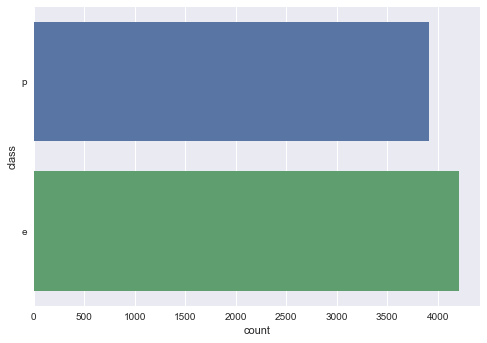

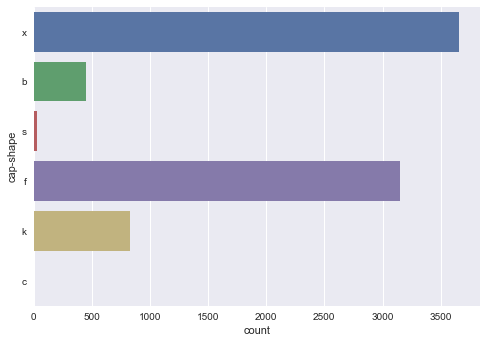

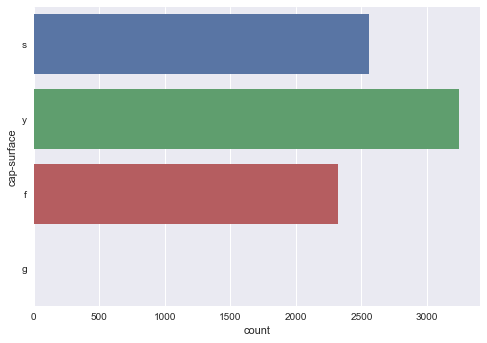

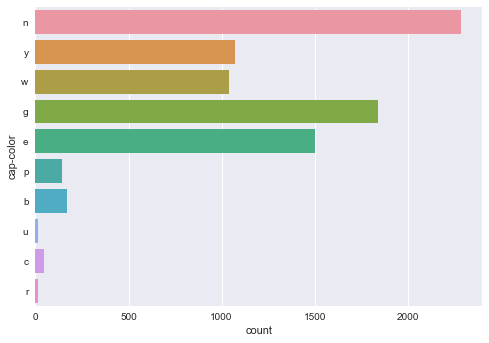

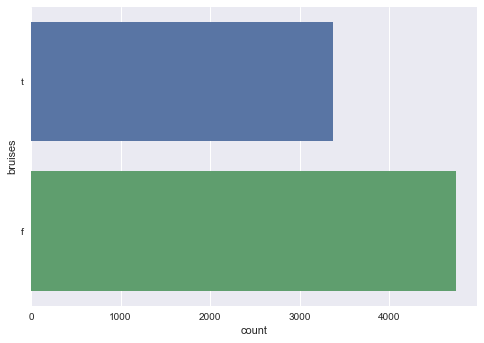

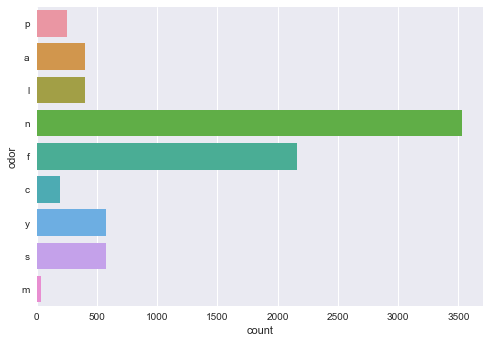

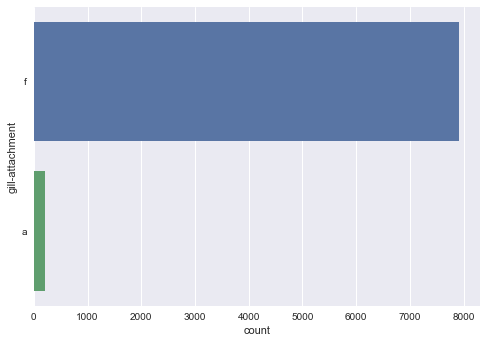

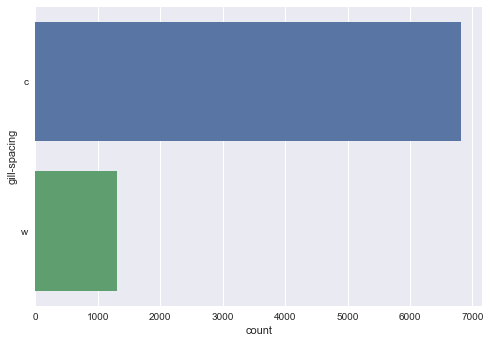

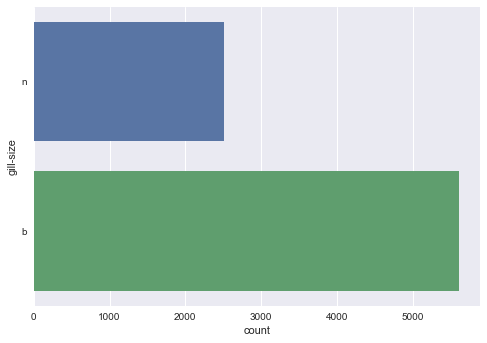

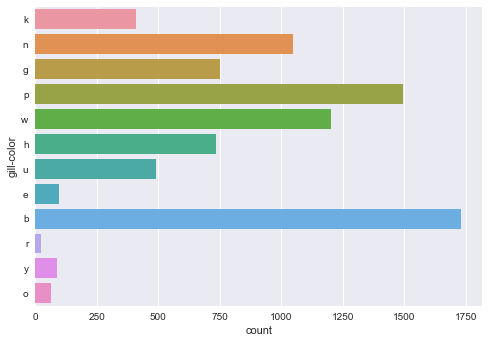

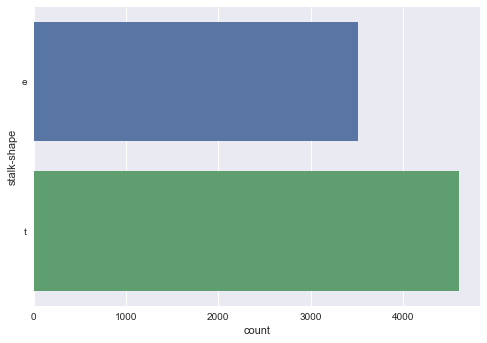

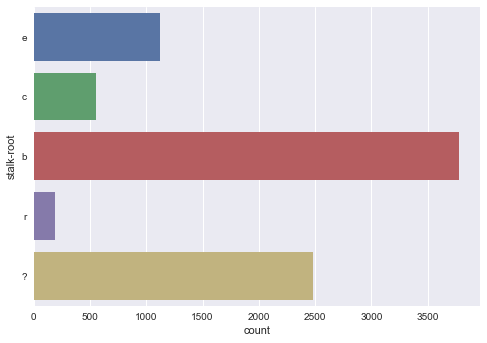

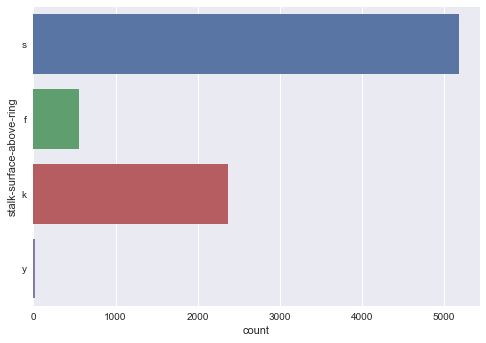

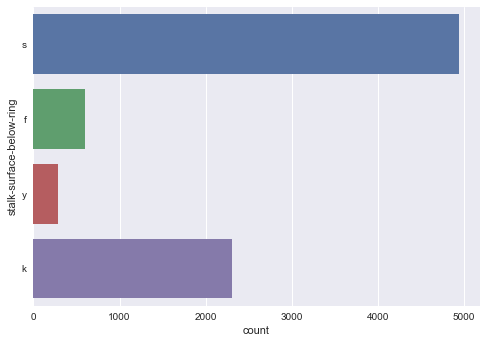

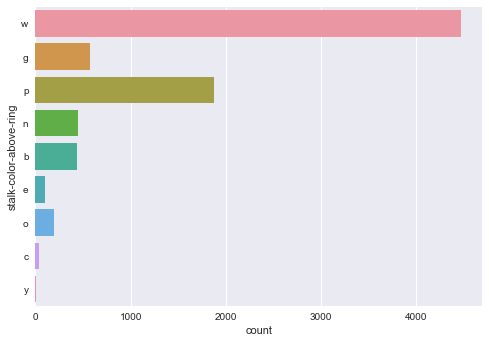

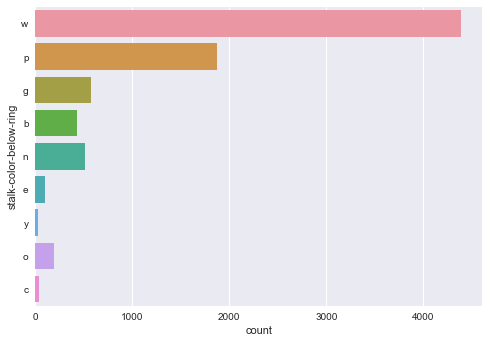

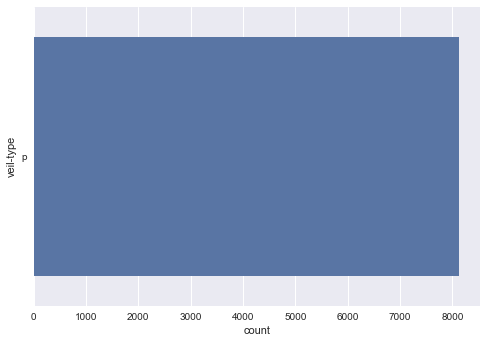

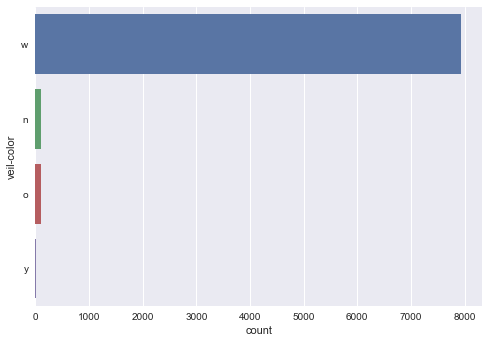

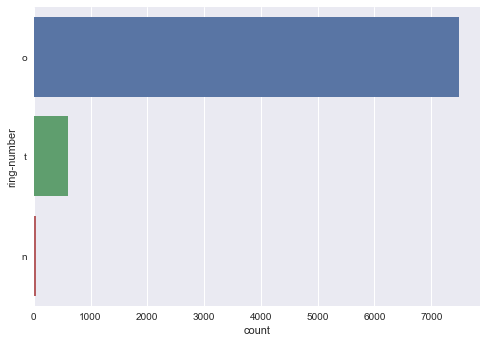

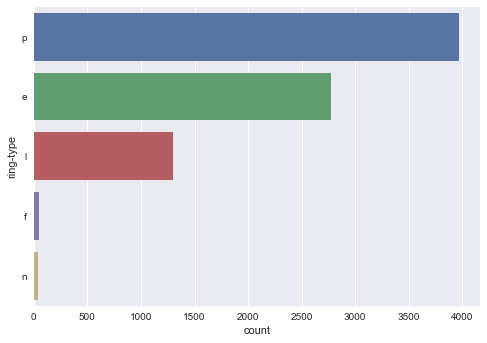

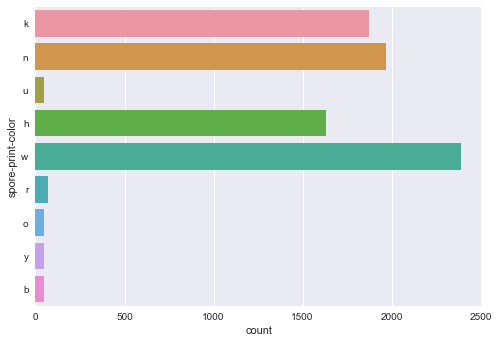

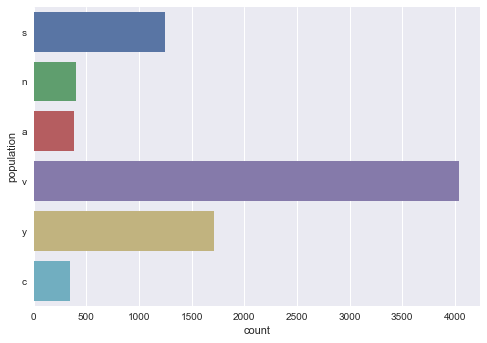

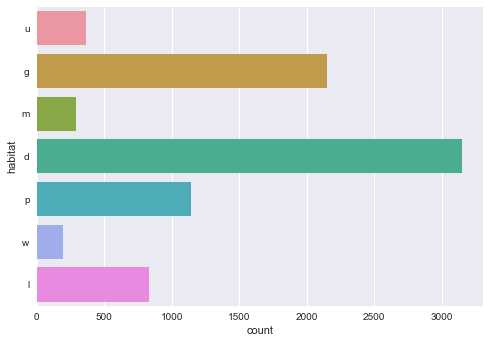

In [6]:
# Plot bar plot for each categorical feature
for feature in raw_df.dtypes[raw_df.dtypes=='object'].index:
    sns.countplot(y=feature, data=raw_df)
    plt.show()

In [7]:
print(raw_df['cap-shape'].unique())
print(raw_df['cap-surface'].unique())
print(raw_df['stalk-root'].unique())
print(raw_df['veil-type'].unique())

['x' 'b' 's' 'f' 'k' 'c']
['s' 'y' 'f' 'g']
['e' 'c' 'b' 'r' '?']
['p']


In [8]:
le = preprocessing.LabelEncoder()

for col in raw_df.columns:
    raw_df[col] = le.fit_transform(raw_df[col])
    
raw_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [9]:
#all rows, just the class labels column
y = raw_df.iloc[:,0] 
# all rows, all columns, except class labels
X = raw_df.iloc[:,1:] 

X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [10]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [11]:
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [12]:
# Standardize the data by scaling it to the range -1 to 1
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ..., 
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)

In [14]:
# Fit the model for SVM
supp = SVC()
supp.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
supp.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': None,
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [16]:
# predicting the response
svm_pred = supp.predict(X_test)
#accuracy of prediction
acc_svm = round(supp.score(X_train, y_train) * 100, 2)
# Confusion matrix for SVM
svm_CM = confusion_matrix(y_test, svm_pred)
print(svm_CM)
print(classification_report(y_test,svm_pred))
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, svm_pred)
# Calculate AUROC
auc_svm = round(auc(fpr, tpr)*100, 2)
print(auc_svm)

[[845   0]
 [  0 780]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       845
          1       1.00      1.00      1.00       780

avg / total       1.00      1.00      1.00      1625

100.0


In [17]:
TP = svm_CM[1, 1]
TN = svm_CM[0, 0]
FP = svm_CM[0, 1]
FN = svm_CM[1, 0]
print(TP)
print(TN)
print(FP)
print(FN)

780
845
0
0


In [18]:
# Fit the model for Logistic Regression
logreg = LogisticRegression() 
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
CM_log = confusion_matrix(y_test, logreg_pred)
print(CM_log)
print(classification_report(y_test,logreg_pred))
fpr, tpr, thresholds = roc_curve(y_test, logreg_pred)
auc_log = round(auc(fpr, tpr)*100,2)
print(auc_log)

[[814  31]
 [ 37 743]]
             precision    recall  f1-score   support

          0       0.96      0.96      0.96       845
          1       0.96      0.95      0.96       780

avg / total       0.96      0.96      0.96      1625

95.79


In [19]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
CM_knn = confusion_matrix(y_test, knn_pred)
print(CM_knn)
print(classification_report(y_test,knn_pred))
fpr, tpr, thresholds = roc_curve(y_test, knn_pred)
auc_knn = round(auc(fpr, tpr)*100,2)
print(auc_knn)

[[845   0]
 [  0 780]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       845
          1       1.00      1.00      1.00       780

avg / total       1.00      1.00      1.00      1625

100.0


In [20]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
dec_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
CM_dec = confusion_matrix(y_test, dec_pred)
print(CM_dec)
print(classification_report(y_test,dec_pred))
fpr, tpr, thresholds = roc_curve(y_test, dec_pred)
auc_dec = round(auc(fpr, tpr)*100,2)
print(auc_dec)

[[845   0]
 [  0 780]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       845
          1       1.00      1.00      1.00       780

avg / total       1.00      1.00      1.00      1625

100.0


In [21]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Decision Tree'],
    'Accuracy': [acc_svm, acc_knn, acc_log, 
               acc_decision_tree],
    'Area under ROC': [auc_svm, auc_knn, auc_log, auc_dec]})
models.sort_values(by='Accuracy', ascending=False)

,Accuracy,Area under ROC,Model
0,100.00,100.00,Support Vector Machines
1,100.00,100.00,KNN
3,100.00,100.00,Decision Tree
2,95.77,95.79,Logistic Regression
